In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import torch
from ddpm import get_dataset, viz_sample, viz_samples, NoiseScheduler, reconstruct, denoise

# learning data

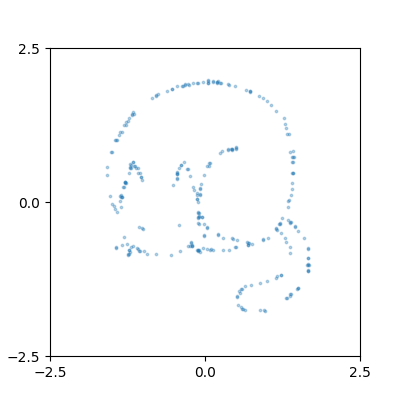

In [3]:
viz_sample(get_dataset(data_size=300).tensors[0])

# forwarding

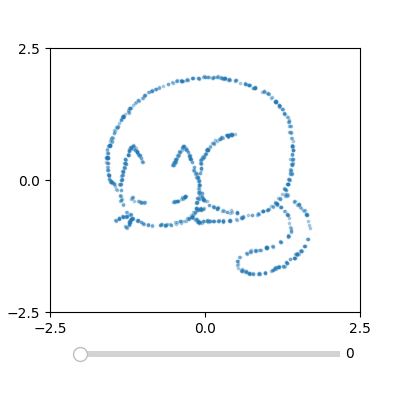

In [4]:
x_0 = get_dataset().tensors[0]  # original data
ns = NoiseScheduler()
samples = [x_0]
for t in range(ns.num_timesteps):
    noise = torch.randn(x_0.shape)
    samples.append(ns.add_noise(x_0, noise, t))
viz_samples(samples)  # you can control timestep via slider

# training

In [5]:
%%time
!python ddpm/train.py  # default cat

100%|██████████████████████████| 1000/1000 [01:22<00:00, 12.07it/s, loss=1.3936]
saving model to /Users/kei18/Desktop/learning_diffusion/learning_results/2023-07-07_19-06-51
CPU times: user 419 ms, sys: 173 ms, total: 592 ms
Wall time: 1min 24s


# denoising

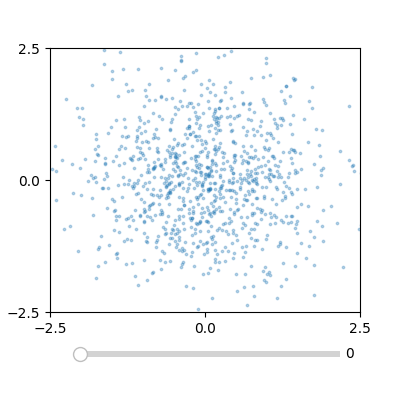

In [6]:
log_dir = "assets/learning_examples/cat"  # set your directory: learning_results/yyyy-mm-dd_hh-mm-ss-xx
eval_data_size = 1000
ns, model = reconstruct(log_dir)
model.eval()
x_last = torch.randn(eval_data_size, 2)
samples = [x_last]
for t in reversed(range(ns.num_timesteps)):
    with torch.no_grad():
        residual = model(samples[-1], t)
    samples.append(ns.remove_noise(samples[-1], residual, t))
viz_samples(samples)

# other examples

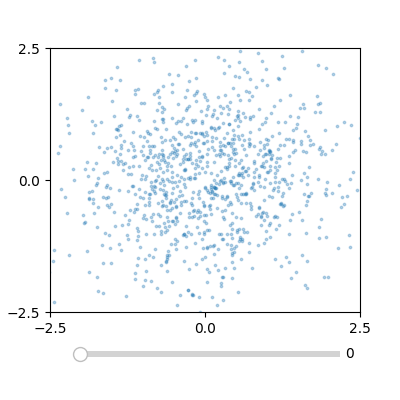

In [7]:
viz_samples(denoise("assets/learning_examples/dino"))

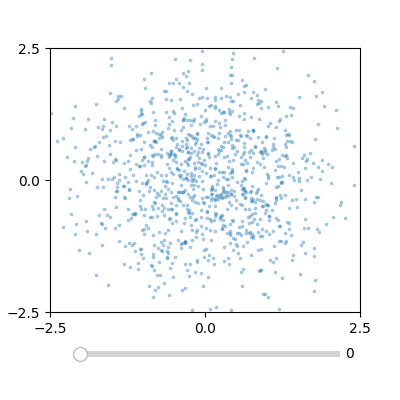

In [8]:
viz_samples(denoise("assets/learning_examples/sheep"))

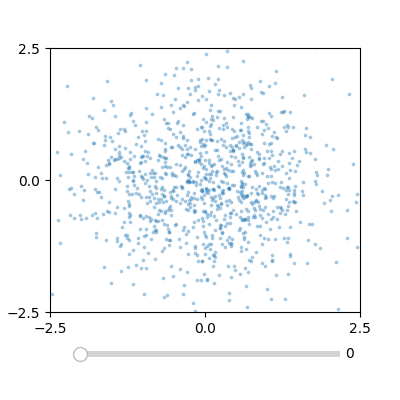

In [9]:
viz_samples(denoise("assets/learning_examples/panda"))